# __CMSE  201 - Spring 2020__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />

# Homework 4: Agent-based Models

In this homework you will continue to learn about agent-based modeling, by developing and implementing a set of rules for how agents interact with each other.  Make sure to use Slack and help room hours if you run into issues!

___

## Goals

### By the end of the homework assignment you will have practiced:

1. Modeling a real world scenario.
2. Building and manipulating agent-based models.
3. Assessing model outcomes.
4. Defining functions to check the state of a model


## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, March 13th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.

## Grading

* Question 1: create board function (5 points)
* Question 2: initialize board and plot board (5 points)
* Question 3: make moves (7 points)
* Question 4: teach Jeff to play (5 points)
* Question 5: am I cornered (5 points)
* Question 6: you've captured me (7 points)
* Question 7: smarter moves (5 points)

Total points possible: **39**
___

# Introduction

An agent-based model is a model where a set of agents interact according to a set of rules.  This is a general framework that can model many different phenomena.  In this Homework assignment you are going to model a game called Checkers or Draughts:

<img src="checkers.jpg" width=400px>

If you've never heard of this game before, go play it online! https://cardgames.io/checkers/

Here is the description of the game:
>The game is played by two players on a checkerboard of 64 squares of 8×8 cells. Each player has 12 chips of the same color (one white and one black) that at the beginning of the game are placed in the black squares of the three rows closest to him. The objective of the checkers game is to capture the opponent’s chips or corner them so that the only moves they can make are those that lead to their capture.

To make the coding simple, we change the rule of Checkers a little bit. Here is a summary of the new rules:



### How to play 
 The two players take turns to move their chips according to the following movement rules. Each player can only move one chip in each turn.
 
**Movement Rules**
* Chips only move diagonally
* A chip can take two types of moves: non-capturing move (walk) and capturing move (jump)   
* non-capturing move (walk): move a chip diagonally one step forward or one step backward. If there is no open square adjacent to a chip, this chip is blocked and can not walk 
* capturing move (jump): you can jump a chip over an opponent's chip diagonally and land at the open square behind the chip you jumped. If the square behind your opponent's chip is occupied, you cannot make the jump
* When you jump over an opponent's chip, you capture it, remove it from the gameboard
* On your turn, if a jump is possible, you must make the jump. 

### How to win
The first player to remove all of his opponent's chips from the board wins the game!

 

We are going to be using "boards", or 2D Numpy arrays to show the state of the game.  An integer number in each spot in the array will be used to keep track of what's there:  
 
**0 = an empty black square**  
**1 = an empty white square**  
**2 = a white chip**  
**3 = a black chip**  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Write a function called `create_board` that creates an empty 8 x 8 checkerboard  (5 points)

The function should create an 8x8 2D Numpy array containing 0s and 1s that represents the checkerboard below. A 1 represents a white square and a 0 represents a black square in the checkerboard.  
<img src='https://www.gramcoschoolsupplies.com/pub/media/catalog/product/cache/image/1000x1320/e9c3970ab036de70892d86c6d221abfe/9/3/93622.jpg' width=200px>

In [3]:
# put your answer here
def create_board(length = 8, width = 8):  # default length and width are 8
    # hint: you may want to use the modulo operation to find the locations of black squares
    board = np.zeros((length,width))
    for i in range(length):
        for j in range(width):
            if (i + j) % 2 == 0:
                board[i,j] = 0
            else:
                board[i,j] = 1 
    return board

a = create_board()
print(a)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


Use `create_board` to generate an empty board and assign it to the variable `empty_board`. Plot `empty_board` using `plt.imshow` to check if it indeed looks like the above picture (it is Okay  if the colors mismatch) 

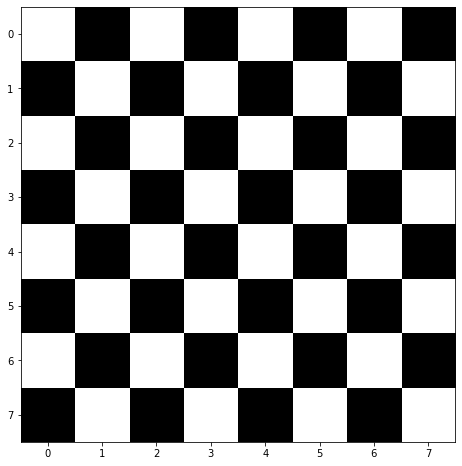

In [4]:
# put your answer here

empty_board = create_board()

fig = plt.figure(figsize=(8,8))

plt.imshow(empty_board, cmap='Greys')   # Greys means the white and black

#plt.colorbar()

### 2) Write a function called `initial_board` that places the 12 white chips and the 12 black chips at their initial locations as shown in the picture below (5 points)
<img src="checkers.jpg" width=200px>

The function should create an 8x8 2D Numpy array representing the above board with chips. Each entry of the array takes four possible values: 0, 1, 2, 3, where

**0 = empty black square**  
**1 = empty white square**  
**2 = white chip**  
**3 = black chip**  



In [5]:
# put your code here
def initial_board(empty_board):
    
    init_board = empty_board.copy() #copy the empty board
    for i in range(empty_board.shape[0]):
        for j in range(empty_board.shape[1]):
            if i <= 2 and (i+j) % 2 != 0:
                init_board[i,j] = 2
            elif i >= 5 and (i+j) % 2 != 0:
                init_board[i,j] = 3         
    return init_board

#print(initial_board(empty_board))

**Store the initial board to the variable `current_board` and plot it using `plt.imshow`. If your answer is correct, the plot should look like this**
<img src="2an.png" width=200px>

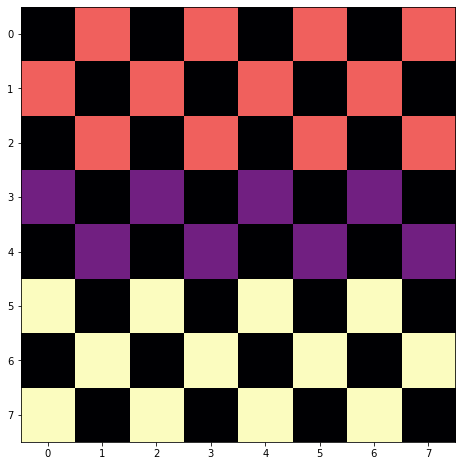

In [6]:
# put your code here
current_board = initial_board(empty_board)
fig = plt.figure(figsize=(8,8))
plt.imshow(current_board, cmap='magma') 




**The following function gives you a more vivid plot of the current gameboard. Try it!**

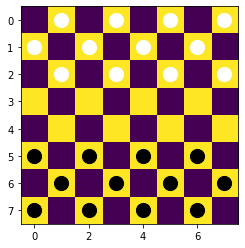

In [7]:
def plot_current_board(current_board,empty_board):
    # function that plots the current board 
    w_x_index= []   # x-locations of white chips
    w_y_index= []   # y-locations of white chips
    b_x_index = []  # x-locations of black chips
    b_y_index = []  # y-locations of black chips
    for i in range(8):    # loop every single cells in this board
        for j in range(8):
            if current_board[i,j]==2: # if the cell is white based on the location of i and j in the current board
                w_x_index.append(j)   #make sure the index of x-axis, based on the column 
                w_y_index.append(i)
            if current_board[i,j]==3: # if the cell is black based on the location of i and j in the current board
                b_x_index.append(j)
                b_y_index.append(i)
    plt.imshow(empty_board)     
    plt.scatter(w_x_index,w_y_index,marker='o',color = 'w',s=200) 
                                    #for white chips, the horizontal position or the index of x-axis and the index of y-axis, the marker's 
                                    #style is O, and the color is white, the size of marker is 200
    plt.scatter(b_x_index,b_y_index,marker='o',color = 'k',s=200) 
                                    #for black chips, the horizontal position or the index of x-axis and the index of y-axis, the marker's 
                                    #style is O, and the color is w, the size of marker is 200
    return 

plot_current_board(current_board,empty_board)  #combine the current board and empty board together 

**Add comments to the above function to explain what each line is doing**

### 3) Make moves: walk and jump. (7 points)

The variable `current_board` stores the current state of the gameboard. By changing its value, we can mimic the moves of the players. Let us now try to move a chip by changing values in `current_board`. According to the movement rule, the white chip at the location (2,1) can take a non-capturing move (a walk) to the location (3,2). Let's realize it!

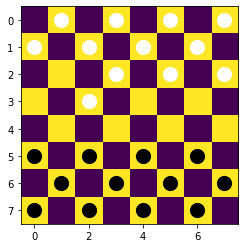

In [8]:
# Put your code here
# Step 1: eliminate the white chip from its current location [2,1] 
#         by changing the value of current_board[2,1] from 2 (white chip) to 1 (empty)
      
current_board[2,1] = 1
#Step 2: insert the white chip to its new location [3,2] 
#by changing the value of current_board[3,2] from 1 (empty) to 2 (white chip)     
current_board[3,2] = 2

# use the plot_current_board function to plot current_board

plot_current_board(current_board,empty_board)

Now it's black's turn. According to the movement rule, the black chip at the location (5,4) can walk to the location (4,3). Let's realize it now.

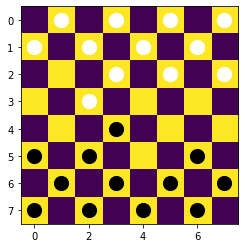

In [9]:
# Put your code here
# eliminate the black chip from its current location

current_board[5,4] = 0
   
current_board[4,3] = 3

# use the plot_current_board function to plot current_board

plot_current_board(current_board,empty_board)


# use the plot_current_board function to plot current_board



Hey, we see an opportunity for a jump! Please jump the white chip at [3,2] over the black chip at [4,3] and remove the black chip from the board.

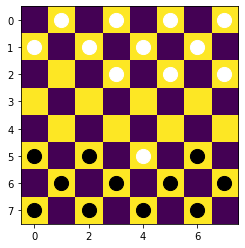

In [10]:
# Put your code here
current_board[3,2] = 1
   
current_board[5,4] = 2

current_board[4,3] = 0

plot_current_board(current_board,empty_board)


### 4) Jeff, can you do this without my help?  (5 points)

While we can keep observing from the plot which chip can be moved and writing code to actually move them, it is cooler if we can make everything automatic. I'm going to teach Jeff (my computer) how to play by writing code and functions he can use. Let's start with the easiest automatic task: determining whether a chip exists at a given location. 

Write a function called `exist_chip` that checks whether there is a chip at a given location on the current board. 

More explicitly, the function takes the given location and the current board as inputs, and return `True` if there is a chip (white or black) at this location and `False` otherwise

You may want to use the `on_board` function to make sure the given location is on board

In [11]:
def on_board(i,j,board):
    # return True if i,j is on the board, 
    # otherwise return False
    if i >= 0 and i < board.shape[0] and j >= 0 and j < board.shape[1]:
        return True
    else:
        return False

In [12]:
def exist_chip(i,j,current_board):
    # check if the location (i,j) is on board
    if on_board(i,j,current_board) == True:
        if current_board[i,j] == 3 or current_board[i,j] ==2:
            return True
        else:
            return False
    else:
        return False
    # check if `current_board' has a chip at (i,j)
print(exist_chip(8,1,current_board))

False


You can run the following cell to test your `exist_chip` function for correctness. All the outputs should be `True`

In [13]:
current_board = initial_board(empty_board)  
print(exist_chip(0,1,current_board) == True)
print(exist_chip(7,0,current_board) == True)
print(exist_chip(8,1,current_board) == False) 
print(exist_chip(6,4,current_board) == False)

True
True
True
True


### 5) Am I cornered ? (5 points)

The second thing we want to teach Jeff is implementing a non-capturing move (also called a walk) is. Recall that a walk is a diagonal move of a chip to one of its neighboring locations (marked by green below). Remember that the move is only possible when the green squares are empty. Otherwise the chip is cornered.
<img src="NCmove.png" width=200px>


Write a function called `is_walkable` to help Jeff determine whether or not a given chip can take a walk to its neighbours. 

In [14]:
def is_walkable(i,j,current_board):
    # find all the diagonal neighbours of (i,j) that are on board and put them into a list
    #(i-1,j+1)
    #(i+1,j+1)
    #(i-1,j-1)
    #(i+1,i-1)
    
    diagonal_nei = [[i-1,j+1],[i+1,j+1],[i-1,j-1],[i+1,j-1]]
    walkable = False  # default the neighbors is false, we cannot move 
    for a in diagonal_nei:
        if on_board(a[0],a[1],current_board):
                if current_board[a[0],a[1]] == 1:
                    walkable = True
                
    return  walkable
    


Now you can use the following code to test if your `is_walkable` function is coded correctly. All the outputs should be `True`

In [15]:
current_board = initial_board(empty_board)
print(is_walkable(0,1,current_board) == False) # if the function of is_walkable return false, and this result is false equals false, so it return ture
print(is_walkable(2,1,current_board) == True)
print(is_walkable(2,7,current_board) == True)
print(is_walkable(5,0,current_board) == True)
print(is_walkable(5,6,current_board) == True)
print(is_walkable(6,1,current_board) == False)

True
True
True
True
True
True


### 6)  You've captured me (7 points)

Recall that a capturing move (also called jump) is a diagonal jump over an opponent's chip. The green squares are possible landing locations of the white chip. The black chip that was jumped over is captured and eliminated from the board. Again, the jump is only possible when the green squares are empty.
<img src="jump.png" width=200px>

Just like `is_walkable`, the function `is_jumpable` checks if a chip at a given location is jumpable.  Read the functions below and complete the empty comments.

In [16]:
def can_jump_over(i,j,k,l,current_board):
#The function checks whether your chip at (i,j) can jump over (k,l) to the square behind (2*k-i,2*l-j) 
    if abs(i-k)!=1 or abs(l-j)!=1: # check if (k,l) is a diagonal neighbour of (i,j)
        return False  
    if current_board[k,l] < 2: # if there is no chip at the (k,l) position: cannot jump
        return False
    if current_board[i,j] == current_board[k,l]: # if the chip at the (k,l) position is also yours: cannot jump
        return False
    elif on_board(2*k-i,2*l-j,current_board)==False:# if the square behind (k,l) isn't on board: can't jump 
        return False
    elif current_board[2*k-i,2*l-j]!=0: # if the square behind (k,l) isn't empty: cannot jump
        return False
    else:                 # otherise: can jump
        return True


In [17]:
def is_jumpable(i,j,current_board):
#The function checks whether your chip at (i,j) has a neighbour to jump over
    directions=[[i+1,j+1],[i-1,j-1],[i+1,j-1],[i-1,j+1]] # There are four potential locations that the chips can move
    for d in directions:                     # iterate every potential locations
        if on_board(d[0],d[1],create_board()): # Doing the boolean statement that decided whether this chip in the board or not
            if can_jump_over(i,j, d[0],d[1],current_board): # Doing the boolean statement that decided whether this chip can jump over or not
                return True                                 # return the result of True, if the this can jump over. 
    return False

### 7)  Smarter moves.  (5 points)

In order to become a smart player, Jeff needs to find all walkable and jumpable chips before he chooses one of them to move. Complete the following function that loops over all chips on the current board and returns the row and column indices of all the walkable ones.

In [18]:
def all_walkable_chips(current_board,whose_move):
    # 
    
    row_position =[]  # create a list to store the row indices of walkable chips
    col_position =[]  # create a list to store the column indices of walkable chips
    if whose_move == 'White':  # if it is White's move
        for i in range(8):   # loop over the board
            for j in range(8):
                if current_board[i,j] == 2 and is_walkable(i,j,current_board):
                #add code here to check whether there is a walkable white chip at this location
                    row_position.append(i)
                    col_position.append(j)
    else:                        # if it is White's move
        for i in range(8):      # loop over the board
            for j in range(8):
                if current_board[i,j] == 3:
            # add code here to check whether there is a walkable white chip at this location
                    row_position.append(i)
                    col_position.append(j)
    return row_position, col_position

Before moving on, test your function using the code below. 

In [19]:
current_board = initial_board(empty_board)
all_walkable_chips(current_board,'White')== ([2,2,2,2],[1,3,5,7])

True

### Congratulations! Now you've taught Jeff the major rules of the game.  
There are a few minor details to fill up though, like Jeff needs to know he cannot walk when a jump possible, or that he can jump several times in a row in one turn, or that he can  choose a random piece to move when there are several in the walkable or jumpable list, etc. These details are provided to you below. By glancing at them, you can see how the seemingly unimportant details can take up a majority of your code! Now let's run them and have fun!

In [20]:
def all_jumpable_chips(current_board,whose_move):
    # Similar to all_walkable_chips, this function finds for a specific player all jumpable 
    # chips of him and return the locations of those chips
     row_position =[]
     col_position =[]
     if whose_move == 'White':
        for i in range(8):
          for j in range(8):
            if current_board[i,j]==2 and is_jumpable(i,j, current_board):
               row_position.append(i)
               col_position.append(j)
     else:
        for i in range(8):
          for j in range(8):
            if current_board[i,j]==3 and is_jumpable(i,j, current_board):
               row_position.append(i)
               col_position.append(j)
     return row_position, col_position
     

In [21]:
def where_to_jump(i,j,current_board):  
    # This function keeps track of the specific landing location after a jump 
    if is_jumpable(i,j,current_board) == False:   
     print("The piece is not jumpable, use the function 'all_jumpable_chips' to find the jumpable pieces") 
    else:
     new_i = []
     new_j = []
     directions = [[i+1,j+1],[i-1,j-1],[i+1,j-1],[i-1,j+1]]
     for d in directions:
         if on_board(d[0],d[1],current_board):
           if can_jump_over(i,j, d[0],d[1],current_board):
              new_i.append(2*d[0]-i)
              new_j.append(2*d[1]-j)
     n = len(new_i)
     rand_dir = np.random.randint(0,n)
     return new_i[rand_dir], new_j[rand_dir]
            
       

In [22]:
def where_to_walk(i,j,current_board):
    # this function returns the new chip location after a walk
    new_i = []
    new_j = []
    directions = [[i+1,j+1],[i-1,j-1],[i+1,j-1],[i-1,j+1]]
    if is_walkable(i,j,current_board) == False:
        print("The piece is not jumpable, use the function 'all_movable_chips' to find the jumpable pieces") 
    else:
         directions = [[i+1,j+1],[i-1,j-1],[i+1,j-1],[i-1,j+1]]
    for d in directions:
        if on_board(d[0],d[1],current_board):
            if is_walkable(d[0],d[1],current_board):
                new_i.append(d[0])
                new_j.append(d[1])       
    n = len(new_i)
  
    rand_dir = np.random.randint(0,n)

    return new_i[rand_dir], new_j[rand_dir]
            

In [23]:
def jump(i,j,new_i,new_j,current_board): 
    # This function updates the current board after a jump
      current_board[new_i,new_j] = current_board[i,j]
      current_board[i,j]=0       
      mid_i = round((new_i+i)/2)
      mid_j = round((new_j+j)/2)
      current_board[mid_i,mid_j] = 0
      return current_board


In [24]:
def walk(i,j,new_i,new_j,current_board): 
     # This function updates the current board after a walk
      current_board[new_i,new_j] = current_board[i,j]                 
      current_board[i,j]=0
      return current_board

In [25]:
# Main function, run it and have fun!! 

from IPython.display import display, clear_output 
from time import sleep

fig = plt.figure(figsize=(4,4))
board = create_board() # create an empty board
board_copy = board.copy()  # create a copy of the empty board
current_board = initial_board(board)  # board with chips at initial locations
for t in range(200): # run 200 turns of the game
    whose_move = 'White'  # white and black take turns to move chips
    i_list,j_list = all_jumpable_chips(current_board,whose_move) # find all jumpable chips
    if i_list:    # if the jumpable set is not empty, a jump must be made
      while i_list: # exhaust all the jumps before moving to the next turn
        ind = np.random.choice(list(range(len(i_list)))) # randomly pick a chip from the jumpable list
        i = i_list[ind]
        j = j_list[ind] 
        new_i,new_j = where_to_jump(i,j,current_board) # find the landing location after the jump 
        board_copy = board.copy()
        board_copy[i,j] = .2
        plot_current_board(current_board,board_copy) # highlight the chip that is about to jump in the plot
        plt.show()
        sleep(0.5)
        clear_output(wait=True) 
        current_board = jump(i,j,new_i,new_j,current_board) # make the jump and update the board
        i_list,j_list = all_jumpable_chips(current_board,whose_move)
        plot_current_board(current_board,board) # plot the current board  
        plt.show()
        sleep(0.5)
        clear_output(wait=True)           
        
    else:                    # if no chip is jumpable, check if any of them can walk
        i_list,j_list = all_walkable_chips(current_board,whose_move) #find all walkable chips
        if i_list:                 # if the walkable list is not empty
        
          ind = np.random.choice(list(range(len(i_list))))  # randomly choose a chip from the list to walk
          i = i_list[ind]
          j = j_list[ind]
          new_i,new_j = where_to_walk(i,j,current_board) # find the location to walk to
          board_copy = board.copy()
          board_copy[i,j] = .5
          plot_current_board(current_board,board_copy) # highlight the chip about to walk 
          plt.show()
          sleep(0.5)
          clear_output(wait=True)
          current_board = walk(i,j,new_i,new_j,current_board) # take the walk and update the board
          plot_current_board(current_board,board) # plot the current board
          plt.show()
          sleep(0.5)
          clear_output(wait=True)           # Reset display
       #   fig.clear() 
        else:               # if the walkable list is empty, Black wins
          print("Black wins!") 
          break
    whose_move = 'Black'# Black's turn
    i_list,j_list = all_jumpable_chips(current_board,whose_move) # find all jumpable chips
    if i_list:
    
      while i_list:
        
        ind = np.random.choice(list(range(len(i_list)))) # randomly pick a chip from the jumpable list
        i = i_list[ind]
        j = j_list[ind]
        new_i,new_j = where_to_jump(i,j,current_board)# find the location to jump to
        board_copy = board.copy()
        board_copy[i,j] = .5
        plot_current_board(current_board,board_copy)# highlight the chip about to jump
        plt.show()
        sleep(0.5)
        clear_output(wait=True)
        current_board = jump(i,j,new_i,new_j,current_board) # make the jump 
        i_list,j_list = all_jumpable_chips(current_board,whose_move) # find all jumpable chips
        plot_current_board(current_board,board) # plot the current board
        plt.show()
        sleep(0.5)
        clear_output(wait=True)
    else:
        i_list,j_list = all_walkable_chips(current_board,whose_move) # find all walkable chips
        if i_list:
        
          ind = np.random.choice(list(range(len(i_list))))
          i = i_list[ind]
          j = j_list[ind]
          new_i,new_j = where_to_walk(i,j,current_board) # find the location to walk to

          board_copy = board.copy()
          board_copy[i,j] = .5
          plot_current_board(current_board,board_copy) # highlight the chip about to walk 
          plt.show()
          sleep(0.5)
          clear_output(wait=True)
          current_board = walk(i,j,new_i,new_j,current_board) # take the walk
          plot_current_board(current_board,board) # plot the current board
          plt.show()
          sleep(0.5)
          clear_output(wait = True)
        else:
          print("White wins!")
          break
   
    

The piece is not jumpable, use the function 'all_movable_chips' to find the jumpable pieces


ValueError: low >= high

## Congratulations! You're made your first game!

### Follow up questions to think about:
1. Here we allow chips to move both forward and backward, but the original rule of Checkers only allows the chips to move forward. Can you modify the code to match that rule? 
2. Right now, players choose which piece to move randomly. Can you write code to make more strategic moves? For example, you may want to allow players to think ahead 1 time step in advance. The question is how to realize this in your code?

---
## Assignment Wrap-up

Fill out the following Google form before you submit your assignment. 

In [181]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/1hcY2oUQ-uQkjayxVypO_9VgchFoZW_MuM_Y-s5Ry_d8/edit" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" section, find the submission folder link for Homework #4, and upload it there.

&#169; Copyright 2018,  Michigan State University Board of Trustees